In [1]:
%matplotlib widget
import numpy as np
import obspy
from hydrophone_data_processing import load, useful_variables, plotting, signal_processing
import scipy.signal as signal
import matplotlib.pyplot as plt
# import initial_event_times as iet
import event_times as iet

import matplotlib.dates as dates

import obspy.signal.trigger as trigger
# trigger.aic_simple

def pad_zeros(a, num, num2=None):
    """
    Pad num zeros at both sides of array a
    """
    if num2 is None:
        num2 = num
    hstack = [np.zeros(num, dtype=a.dtype), a, np.zeros(num2, dtype=a.dtype)]
    return np.hstack(hstack)

def detect_event_on_all_hydrophones(id):
    event = {}
    event['meta'] = iet.df.iloc[id]
    
    for h in ['h3', 'h4', 'h5', 'h6']:

        # data processing
        tr = iet.get_event_window(event['meta']['event_times (abs)'], hydrophone=h)

        # hann window taper
        tr.taper(type='hann', max_percentage=0.5)

        # aic detector initial hydrophone
        aic = trigger.aic_simple(tr.data)

        # ltasta other hydrophones
        starttime = 0 if h==event['meta'].hphone_idx else aic.argmin()
        # print(starttime)
        ltasta_a = tr.data.copy()
        ltasta_a[:starttime] = np.random.normal(0, scale=1e-2, size=starttime)
        ltasta = trigger.classic_sta_lta_py(a=ltasta_a, nsta=10, nlta=351//4)

        # data storage
        event[h] = {
            'data':tr.copy()
            ,'aic':aic
            ,'starttime':starttime
            ,'ltasta_data':ltasta_a
            ,'ltasta':ltasta
        }
    return event

number of events detected: (1975, 7)


In [2]:
iet.df.head()

,index,event_times (mpl),event_times (abs),hphone_idx,ones,event_times,p_arrival_hphone_idx
0,0,18037.318174,2019-05-21T07:38:10.208000Z,h3,1,2019-05-21 07:38:10.208000+00:00,2019-05-21 07:38:10.186000+00:00
1,1,18037.318189,2019-05-21T07:38:11.526000Z,h3,1,2019-05-21 07:38:11.526000+00:00,2019-05-21 07:38:11.517000+00:00
2,2,18037.318203,2019-05-21T07:38:12.754000Z,h3,1,2019-05-21 07:38:12.754000+00:00,2019-05-21 07:38:12.723000+00:00
3,3,18037.318219,2019-05-21T07:38:14.141000Z,h3,1,2019-05-21 07:38:14.141000+00:00,2019-05-21 07:38:14.107000+00:00
4,4,18037.318222,2019-05-21T07:38:14.405000Z,h3,1,2019-05-21 07:38:14.405000+00:00,2019-05-21 07:38:14.592000+00:00


In [33]:
for i in iet.df.index:
    event = detect_event_on_all_hydrophones(id=i)
    event_aic_times = []

0       {'data': (0.0, 1.5168604033742559e-06, -7.8150...
1       {'data': (0.0, 1.8588186449344378e-06, 6.93484...
2       {'data': (-0.0, -7.666045700504396e-06, -6.119...
3       {'data': (0.0, 4.196025891808345e-06, 8.537211...
4       {'data': (-0.0, 5.540639064757672e-06, 3.49713...
                              ...                        
1970    {'data': (0.0, 1.7283843932210625e-07, -3.1539...
1971    {'data': (-0.0, -6.368040682915244e-07, -4.327...
1972    {'data': (-0.0, -1.3369165501733361e-06, 2.365...
1973    {'data': (0.0, 1.3509115574690663e-06, 3.33595...
1974    {'data': (0.0, 1.201757411236922e-06, 3.610171...
Length: 1975, dtype: object

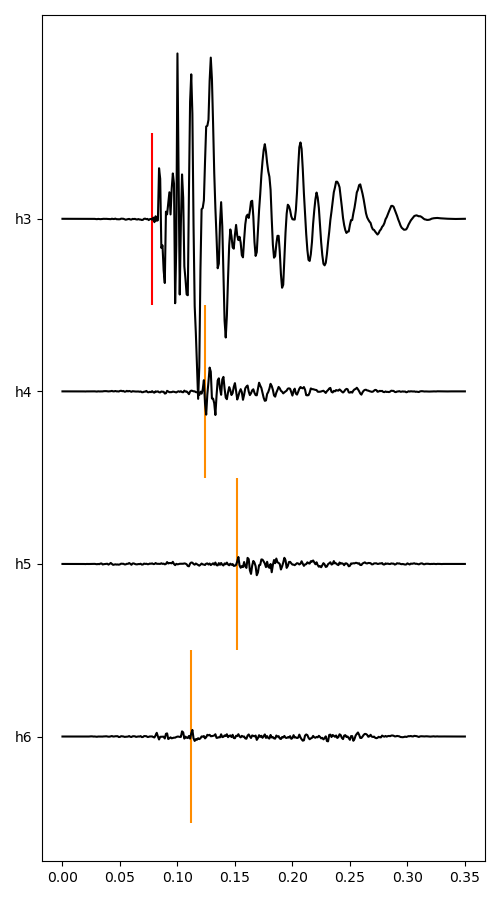

In [8]:
event = detect_event_on_all_hydrophones(id=75)
hydrophone_ids = ['h6', 'h5', 'h4', 'h3']

fig, ax = plt.subplots(figsize=(5,9))

for n, h in enumerate(hydrophone_ids):
    e = event[h]
    t = e['data'].times()
    ax.plot(t, e['data'].data+n, color='black')

    if h == event['meta'].hphone_idx:
        ax.vlines(t[e['aic'].argmin()], ymin=-0.5+n, ymax=0.5+n, color='red')
    else:
        ltasta_diff = np.diff(e['ltasta'])
        ax.vlines(t[ltasta_diff.argmax()], ymin=-0.5+n, ymax=0.5+n, color='darkorange')

ax.set_yticks([0, 1, 2, 3])
ax.set_yticklabels(hydrophone_ids)
fig.tight_layout()

h6 0.153
h5 0.111
h4 first 0.086
h3 0.137
starttime 2019-05-21T08:05:17.933000Z


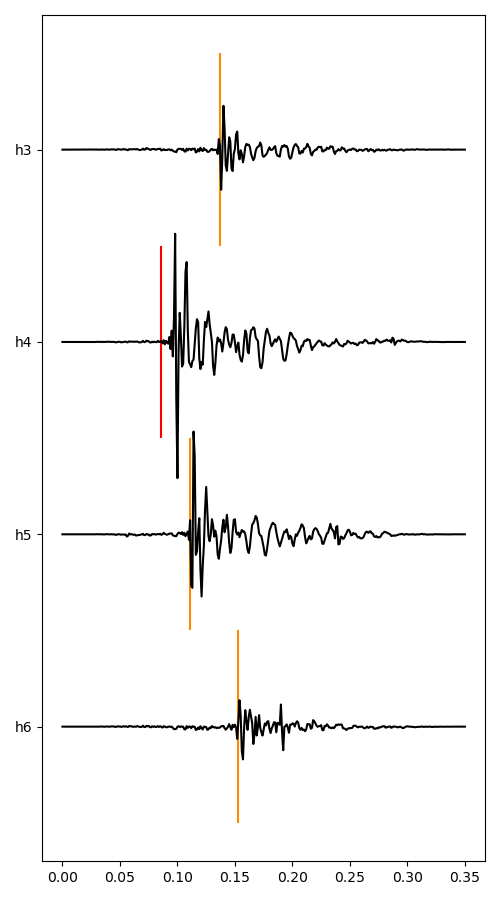

In [47]:
event = detect_event_on_all_hydrophones(id=750)
hydrophone_ids = ['h6', 'h5', 'h4', 'h3']

fig, ax = plt.subplots(figsize=(5,9))

for n, h in enumerate(hydrophone_ids):
    e = event[h]
    t = e['data'].times()
    ax.plot(t, e['data'].data+n, color='black')

    if h == event['meta'].hphone_idx:
        ax.vlines(t[e['aic'].argmin()], ymin=-0.5+n, ymax=0.5+n, color='red')
        # print(e)
        print(h, 'first', t[e['aic'].argmin()])
    else:
        ltasta_diff = np.diff(e['ltasta'])
        ax.vlines(t[ltasta_diff.argmax()], ymin=-0.5+n, ymax=0.5+n, color='darkorange')
        print(h, t[ltasta_diff.argmax()])
print('starttime', e['data'].stats.starttime)

ax.set_yticks([0, 1, 2, 3])
ax.set_yticklabels(hydrophone_ids)
fig.tight_layout()

In [44]:
e['data'].stats.starttime

2019-05-21T08:05:17.933000Z